In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

from scipy.spatial.distance import euclidean


## NOMINATE scores

This analysis uses the [NOMINATE](https://en.wikipedia.org/wiki/NOMINATE_(scaling_method)) scores from: https://voteview.com/data

In [2]:
moc_df = pd.read_csv('Hall_members.csv')
moc_df.head()

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,bioguide_id,born,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0,USA,5000,NaN,NaN,"WASHINGTON, George",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,4766,1,98,CT,5000,0.0,1.0,"HUNTINGTON, Benjamin",H000995,1736.0,1800.0,0.639,0.304,-29.04670,0.708,84.0,12.0,NaN,0.649,0.229
2,1,House,8457,1,98,CT,5000,0.0,1.0,"SHERMAN, Roger",S000349,1721.0,1793.0,0.589,0.307,-40.59580,0.684,107.0,18.0,NaN,0.614,0.298
3,1,House,9062,1,98,CT,5000,0.0,1.0,"STURGES, Jonathan",S001047,1740.0,1819.0,0.531,0.448,-25.87361,0.724,80.0,13.0,NaN,0.573,0.529
4,1,House,9489,1,98,CT,5000,0.0,1.0,"TRUMBULL, Jonathan, Jr.",T000389,1740.0,1809.0,0.692,0.246,-30.47113,0.750,106.0,11.0,NaN,0.749,0.166


In [3]:
mk_df = moc_df[moc_df['bioname'] == 'KENNEDY, Mark']
mk_df

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,bioguide_id,born,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
35441,107,House,20121,33,2,MN,200,0.0,1.0,"KENNEDY, Mark",K000358,1957.0,NaN,0.409,0.304,-248.83571,0.685,658.0,93.0,NaN,0.569,0.185
35887,108,House,20121,33,6,MN,200,0.0,1.0,"KENNEDY, Mark",K000358,1957.0,NaN,0.409,0.304,-166.46101,0.820,841.0,62.0,NaN,0.520,-0.159
36329,109,House,20121,33,6,MN,200,0.0,1.0,"KENNEDY, Mark",K000358,1957.0,NaN,0.409,0.304,-261.13786,0.742,876.0,116.0,NaN,0.382,-0.138


In [100]:
mk_dim1 = mk_df['nominate_dim1'].mean()
mk_dim2 = mk_df['nominate_dim2'].mean()

print(mk_dim1,mk_dim2)

0.409 0.304


### Compared to all Colorado legislators since the 80th Congress (1947–2019)

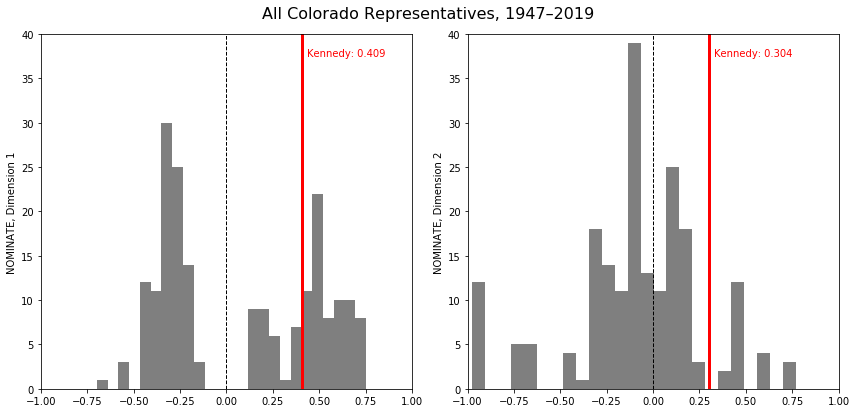

In [112]:
postwar_co_df = moc_df[(moc_df['state_abbrev'] == 'CO') & (moc_df['congress'] >= 80)]

f,axs = plt.subplots(1,2,figsize=(12,6),sharex=True,subplot_kw={'ylim':(0,40),'xlim':(-1,1)})
postwar_co_df[['nominate_dim1','nominate_dim2']].hist(bins=25,ax=axs,color='k',alpha=.5)
axs[0].axvline(mk_dim1,c='r',lw=3)
axs[1].axvline(mk_dim2,c='r',lw=3)

axs[0].set_ylabel('NOMINATE, Dimension 1')
axs[1].set_ylabel('NOMINATE, Dimension 2')

for _ax in axs:
    _ax.axvline(0,c='k',lw=1,ls='--')
    _ax.grid(None)
    _ax.set_title(None)

axs[0].text(s="Kennedy: {:.3f}".format(mk_dim1),x=mk_dim1+.025,y=37.5,color='r',horizontalalignment='left')
axs[1].text(s="Kennedy: {:.3f}".format(mk_dim2),x=mk_dim2+.025,y=37.5,color='r',horizontalalignment='left')

f.suptitle('All Colorado Representatives, 1947–2019',fontsize=16)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
f.savefig('nominate_all_co.png',dpi=300)

These scores are more extreme than what percentage of the population?

In [5]:
1 - (postwar_co_df['nominate_dim1'] > mk_df['nominate_dim1'].mean()).sum()/len(postwar_co_df)

0.6567164179104478

In [6]:
1 - (postwar_co_df['nominate_dim2'] > mk_df['nominate_dim2'].mean()).sum()/len(postwar_co_df)

0.8955223880597015

### Compared to all legislators in 107th, 108th, and 109th Congresses

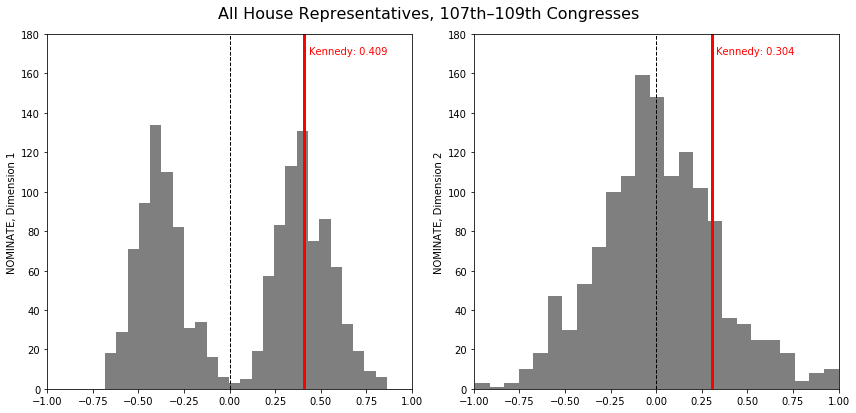

In [111]:
postmillenium_df = moc_df[(moc_df['congress'] > 106) & (moc_df['congress'] < 110)].copy()

f,axs = plt.subplots(1,2,figsize=(12,6),sharex=True,
                     subplot_kw={'ylim':(0,180),'xlim':(-1,1)})
postmillenium_df[['nominate_dim1','nominate_dim2']].hist(bins=25,ax=axs,color='k',alpha=.5)
axs[0].axvline(mk_dim1,c='r',lw=3)
axs[1].axvline(mk_dim2,c='r',lw=3)

for _ax in axs:
    _ax.axvline(0,c='k',lw=1,ls='--')
    _ax.grid(None)
    _ax.set_title(None)

axs[0].text(s="Kennedy: {:.3f}".format(mk_dim1),x=mk_dim1+.025,y=170,color='r',horizontalalignment='left')
axs[1].text(s="Kennedy: {:.3f}".format(mk_dim2),x=mk_dim2+.025,y=170,color='r',horizontalalignment='left')

axs[0].set_ylabel('NOMINATE, Dimension 1')
axs[1].set_ylabel('NOMINATE, Dimension 2')

f.suptitle('All House Representatives, 107th–109th Congresses',fontsize=16)

f.tight_layout(rect=[0, 0.03, 1, 0.95])
f.savefig('nominate_all_107-109.png',dpi=300)

These scores are more extreme than what percentage of the population?

In [8]:
1 - (postmillenium_df['nominate_dim1'] > mk_df['nominate_dim1'].mean()).sum()/len(postmillenium_df)

0.7422758100979654

In [9]:
1 - (postmillenium_df['nominate_dim2'] > mk_df['nominate_dim2'].mean()).sum()/len(postmillenium_df)

0.840241145440844

## 2D plot with most-similar opposing member

In [77]:
postmillenium_df = postmillenium_df[['nominate_dim1','nominate_dim2']].apply(lambda x:euclidean(x,[mk_dim1,mk_dim2]),axis=1)

(0.409, 0.304)

In [117]:
c1 = -.45 < postmillenium_df['nominate_dim1']
c2 = postmillenium_df['nominate_dim1'] < -.35
c3 = -.35 < postmillenium_df['nominate_dim2']
c4 = postmillenium_df['nominate_dim2'] < -.25
dem_nominate_df = postmillenium_df[c1 & c2 & c3 & c4].drop_duplicates(subset='icpsr').copy()

dem_nominate_df['distance'] = dem_nominate_df[['nominate_dim1','nominate_dim2']].apply(lambda x:euclidean(x,[-mk_dim1,-mk_dim2]),axis=1)
dem_nominate_df.sort_values('distance',ascending=True)

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,bioguide_id,born,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2,distance
35614,107,House,29571,49,10,TX,100,0.0,1.0,"DOGGETT, Lloyd Alton, II",D000399,1946.0,NaN,-0.402,-0.311,-233.44096,0.70835,677.0,94.0,NaN,-0.502,-0.308,0.009899
35255,107,House,15005,71,26,CA,100,0.0,1.0,"BERMAN, Howard Lawrence",B000410,1941.0,NaN,-0.404,-0.286,-110.27255,0.83900,629.0,43.0,NaN,-0.397,-0.348,0.018682
35300,107,House,29710,62,1,CO,100,0.0,1.0,"DeGETTE, Diana",D000197,1957.0,NaN,-0.432,-0.312,-132.88650,0.81738,659.0,57.0,NaN,-0.508,-0.511,0.024352
35504,107,House,29379,13,14,NY,100,0.0,1.0,"MALONEY, Carolyn Bosher",M000087,1946.0,NaN,-0.387,-0.276,-128.53159,0.82280,659.0,56.0,NaN,-0.363,-0.392,0.035609


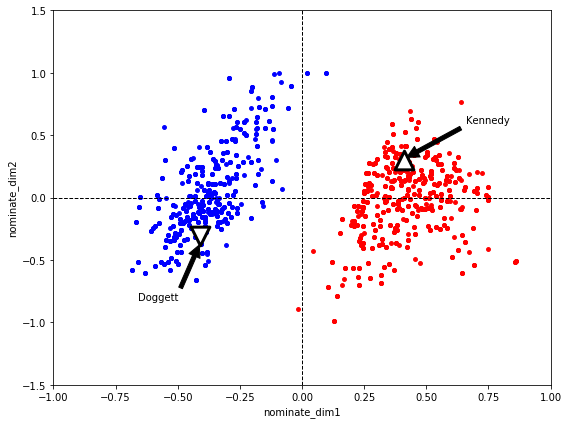

In [92]:
f,ax = plt.subplots(1,1,figsize=(8,6),sharex=True,subplot_kw={'ylim':(-1.5,1.5),'xlim':(-1,1)})
postmillenium_df[postmillenium_df['party_code']==100].plot.scatter(x='nominate_dim1',y='nominate_dim2',c='b',s=15,ax=ax)
postmillenium_df[postmillenium_df['party_code']==200].plot.scatter(x='nominate_dim1',y='nominate_dim2',c='r',s=15,ax=ax)

ax.scatter(mk_dim1,mk_dim2,s=350,marker='^',lw=3,c='w',zorder=1,edgecolor='k')
ax.scatter(-mk_dim1,-mk_dim2,s=350,marker='v',lw=3,c='w',zorder=1,edgecolor='k')
ax.annotate(s='Kennedy',xy=(mk_dim1,mk_dim1-.1),xytext=(mk_dim1+.25,mk_dim1+.25),
            arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left', verticalalignment='top')
ax.annotate(s='Doggett',xy=(-mk_dim1,-mk_dim1+.05),xytext=(-mk_dim1-.25,-mk_dim1-.35),
            arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left', verticalalignment='top')
ax.axvline(0,ls='--',lw=1,c='k')
ax.axhline(0,ls='--',lw=1,c='k')
f.tight_layout()
f.savefig('nominate_kennedy_doggett.png',dpi=300)


## Presidential support

This analysis uses presidential support scores from: https://voteview.com/articles/presidential_support_scores

In [114]:
pres_df = pd.read_csv('house_presidential_support.csv')
pres_df.head()

,congress,year,icpsr,statecode,district,state,party,occupancy,means,name,pres_matches,pres_votes,pres_there_for,score
0,1,1789,154,3,1,MASSACHUSETTS,5000,0.0,1.0,AMES,0,0,0,NaN
1,1,1789,259,47,1,NORTH CAROLINA,4000,0.0,1.0,ASHE,0,0,0,NaN
2,1,1789,379,44,2,GEORGIA,4000,0.0,1.0,BALDWIN,0,0,0,NaN
3,1,1789,649,13,3,NEW YORK,5000,0.0,1.0,BENSON,0,0,0,NaN
4,1,1789,786,40,9,VIRGINIA,4000,1.0,1.0,BLAND,0,0,0,NaN


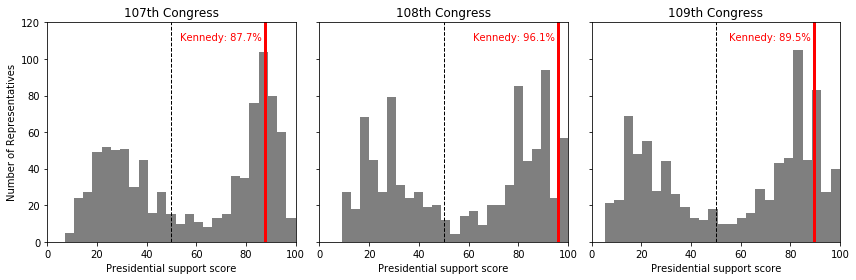

In [115]:
mark_pres_df = pres_df[pres_df['icpsr'] == 20121]

f,axs = plt.subplots(1,3,figsize=(12,4),sharey=True,subplot_kw={'ylim':(0,120),'xlim':(0,100)})

pres_df.loc[pres_df['congress'] == 107,'score'].hist(bins=25,ax=axs[0],color='k',alpha=.5)
pres_df.loc[pres_df['congress'] == 108,'score'].hist(bins=25,ax=axs[1],color='k',alpha=.5)
pres_df.loc[pres_df['congress'] == 109,'score'].hist(bins=25,ax=axs[2],color='k',alpha=.5)

for i,_ax in enumerate(axs):
    _ax.grid(None)
    _ax.set_title('{0}th Congress'.format(107+i))
    _ax.set_xlabel('Presidential support score')

axs[0].set_ylabel('Number of Representatives')

mark_107_pres_score = mark_pres_df.loc[mark_pres_df['congress'] == 107,'score'].mean()
mark_108_pres_score = mark_pres_df.loc[mark_pres_df['congress'] == 108,'score'].mean()
mark_109_pres_score = mark_pres_df.loc[mark_pres_df['congress'] == 109,'score'].mean()

axs[0].axvline(mark_107_pres_score,c='r',lw=3)
axs[1].axvline(mark_108_pres_score,c='r',lw=3)
axs[2].axvline(mark_109_pres_score,c='r',lw=3)

axs[0].axvline(50,c='k',lw=1,ls='--')
axs[1].axvline(50,c='k',lw=1,ls='--')
axs[2].axvline(50,c='k',lw=1,ls='--')

axs[0].text(s="Kennedy: {:.1f}%".format(mark_107_pres_score),x=mark_107_pres_score-1.5,y=110,color='r',horizontalalignment='right')
axs[1].text(s="Kennedy: {:.1f}%".format(mark_108_pres_score),x=mark_108_pres_score-1.5,y=110,color='r',horizontalalignment='right')
axs[2].text(s="Kennedy: {:.1f}%".format(mark_109_pres_score),x=mark_109_pres_score-1.5,y=110,color='r',horizontalalignment='right')

f.tight_layout()
f.savefig('presidential_support.png',dpi=300)